<a href="https://colab.research.google.com/github/anuragsingh17ai/Computer-Vision/blob/main/03_multiclassification_within_same_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

img = read_image("/content/webcam-toy-photo1.jpg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.5).to("cuda")
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img).to("cuda")]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
scores = prediction["scores"]


In [ ]:
import cv2
def draw_boxes_and_labels(image, bbox, labels,scores):
    img_copy = image.copy()

    for i in range(len(bbox)):
        x, y, w, h = bbox[i].detach().cpu().numpy().astype('int')
        cv2.rectangle(img_copy, (x, y), (w, h), (0, 0, 255), 2)

        # class_index = labels[i].numpy().astype('int')
        class_detected = labels[i]
        score = scores[i]

        cv2.putText(img_copy, class_detected, (x, y + 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.putText(img_copy, str(score), (x, y + 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)

    return img_copy

img = draw_boxes_and_labels(img.permute(1,2,0).cpu().numpy(), bbox=prediction["boxes"],
                          labels=labels,
                          scores = scores.detach().cpu().numpy()
                          )


In [ ]:
im = to_pil_image(box.detach())
im.show()

(-0.5, 799.5, 449.5, -0.5)

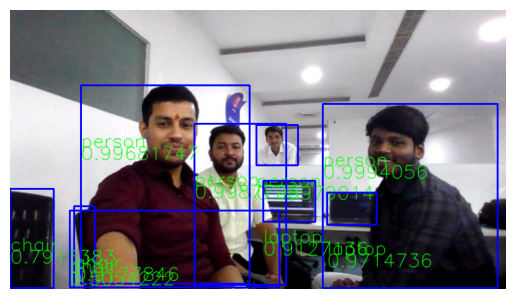

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis(False)

In [ ]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [ ]:
from torchinfo import summary

In [ ]:
summary(model,
        input_size=(1, 1, 1333, 1333),
        col_names=["input_size",
                "output_size",
                "num_params",
                "trainable"],
        col_width= 25,
        row_settings = ["var_names"]
        )

Layer (type (var_name))                            Input Shape               Output Shape              Param #                   Trainable
FasterRCNN (FasterRCNN)                            [1, 1, 1333, 1333]        [0, 4]                    --                        Partial
├─GeneralizedRCNNTransform (transform)             [1, 1, 1333, 1333]        [1, 3, 800, 800]          --                        --
├─BackboneWithFPN (backbone)                       [1, 3, 800, 800]          [1, 256, 13, 13]          --                        Partial
│    └─IntermediateLayerGetter (body)              [1, 3, 800, 800]          [1, 2048, 25, 25]         --                        Partial
│    │    └─Conv2d (conv1)                         [1, 3, 800, 800]          [1, 64, 400, 400]         (9,408)                   False
│    │    └─BatchNorm2d (bn1)                      [1, 64, 400, 400]         [1, 64, 400, 400]         (128)                     False
│    │    └─ReLU (relu)                         

In [ ]:
import torch
pred = model([preprocess(torch.randn(size=(3,1333,133))).to("cuda")])

In [ ]:
pred

[{'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], device='cuda:0', dtype=torch.int64),
  'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>)}]

In [ ]:
model.roi_heads

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): FastRCNNConvFCHead(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
weights.meta["categories"]

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted